# Cumulative Visualizations

In this folder, we've included multiple Jupyter notebooks that analyze datasets given as part of the Vertical 2 project. This notebook brings all of those visualizations together and summarizes them using the $R$ and $R^2$ coefficient. We have included the following features:
- Proportion of 25+ Year Olds Educated Less than High School
- Primary Language Limited English
- Proportion of Hispanic or Latino
- Primary Language Other than English 
- Primary Language English 
- Proportion of Other Race/Ethnicity 
- Proportion of Black
- Proportion of 25+ Year Olds with a Bachelor's Degree or Higher 
- Proportion of 25+ Year Old High School Graduates
- Median Age in 2010
- Unemployment Rate
- Proportion of Asian 
- Proportion of Native Hawaiian or Other Pacific Islander 0.056321184409277525
- Proportion of White
- People per ICU Bed
- People per Hospital
- Proportion of 25+ Year Olds Educated Some College
- People per Doctor
- Proportion of American Indian
- Disability Status

For each feature, we took its corresponding data from the _acs_subset_county_level_economic_data.csv_ and _county_level_data.csv_ datasets. After graphing the feature against the county's proportion of total COVID-19 cases, we then calculated the $R$ and $R^2$ coefficient for each of these graphs. The next few sections load in the data, visualizes our correlations, and performs the calculation of the $R$ coefficients. If you want the final product, skip to the [Conclusion](https://colab.research.google.com/drive/1QA2wyinQlPzd7URQbcWIrdxtMPKqfYW_#scrollTo=xvIZviU3crAi&line=1&uniqifier=1) section.

# Data Cleaning

This section imports our libraries and data and loads them into our notebook.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
path = '/content/drive/My Drive/Blueprint_Datathon/Data/Disparities/'
acs_county_data = pd.read_csv(path + 'acs_subset_county_level_economic_data.csv')
county_level_data = pd.read_csv(path + 'county_level_data.csv')

display(len(acs_county_data.index), len(county_level_data.index))

280

1325

Let's merge the acs_county_data and county_level_data with each other.

In [9]:
merged = county_level_data.merge(acs_county_data, left_on=['CountyName', 'State'], right_on=["COUNTY", "REGION"], how='inner')
over_60 = merged.sort_values('DISABILITY_STATUS_Yes', ascending = False).drop_duplicates(subset = ['CountyName', 'StateName'])
merged.drop_duplicates(['CountyName', 'StateName'], inplace=True)
merged.head()

,Unnamed: 0_x,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,...,PLACE_OF_BIRTH_Native,PLACE_OF_BIRTH_Foreign_Born,PLACE_OF_BIRTH_Entered_2010_or_Later,PLACE_OF_BIRTH_Entered _2000_to_2009,PLACE_OF_BIRTH_Entered_Before_2000,PLACE_OF_BIRTH_Naturalized_US_ Citizen,PLACE_OF_BIRTH_Not_US_ Citizen,LANGUAGE_Population_5_Years_and_Over,LANGUAGE_English_Only,LANGUAGE_Other_Than_ English,LANGUAGE_Limited_English,EMPLOYMENT_STATUS_Population_16_Years_And_Over,EMPLOYMENT_STATUS_In_Labor_Force,EMPLOYMENT_STATUS_Civilian labor force,EMPLOYMENT_STATUS_Employed,EMPLOYMENT_STATUS_Unemployed,EMPLOYMENT_STATUS_Percent_Civilian_Labor_Force,EMPLOYMENT_STATUS_Percent_Armed forces,EMPLOYMENT_STATUS_Not_in_Labor_Force,INCOME_12_MONTHS_Population,INCOME_12_MONTHS_With_Earnings,INCOME_12_MONTHS_Mean_Dollars_Earned,INCOME_12_MONTHS_WITH_Social_Security,INCOME_12_MONTHS_SS_Mean_Dollars,INCOME_12_MONTHS_With_Suppl_Security_Income,INCOME_12_MONTHS_Mean_Suppl_Sec_Dollars,INCOME_12_MONTHS_With_Cash_Public_Assistance,INCOME_12_MONTHS_Mean_Cash_Public_Assistance_Dollars,INCOME_12_MONTHS_With_Retirement_Income,INCOME_12_MONTHS_Mean_Retirement_Income_Dollars,INCOME_12_MONTHS_With_Food_Stamps,POVERTY_STATUS_Population,POVERTY_STATUS_Below_100_Percent_Level,POVERTY_STATUS_100_to_149_Percent_Level,POVERTY_STATUS_Above_150_Percent_Level,HOUSING_Total_Occupied_Units,HOUSING_HH_Size_Owner,HOUSING_HH_Size_Renter,HOUSING_No_Phone,HOUSING_OVER_1_Occupant_Per_Room
0,1843,36047,36,47,Kings,NY,New York,40.640578,-73.954654,40.650523,-73.954811,Northeast,Middle Atlantic,1,2582830,1254966,1393805,0.473792,356714,35369.2,2504700,34.1,386673,309657,635.0,9.7,195.8,19.5,13.840802,23.05,35442,9307,6,12,318,4.541512,90415,86783,81356,78035,...,1664420.0,918410.0,0.203,0.223,0.574,0.620,0.380,2395734.0,0.557,0.443,0.213,2050989.0,0.635,0.634,0.603,0.031,0.049,0.000,0.365,969317.0,0.783,102086.0,0.253,16939.0,0.090,9350.0,0.046,3248.000,0.119,25240.0,0.223,2557510.0,0.190,0.096,0.714,969317.0,2.97,2.47,0.018,0.095
2,1860,36081,36,81,Queens,NY,New York,40.683532,-73.814712,40.721294,-73.833451,Northeast,Middle Atlantic,1,2278906,1143190,1215392,0.484694,354809,20553.6,2230722,37.2,374573,308099,411.0,10.2,180.0,22.2,12.427777,24.13,16874,7009,5,6,129,3.463349,67891,64573,63406,60360,...,1193111.0,1085795.0,0.214,0.239,0.546,0.583,0.417,2137881.0,0.436,0.564,0.294,1869987.0,0.643,0.643,0.610,0.033,0.052,0.000,0.357,788110.0,0.809,93677.0,0.288,18027.0,0.056,9592.0,0.028,3196.000,0.152,26479.0,0.130,2250553.0,0.115,0.090,0.795,788110.0,3.02,2.72,0.012,0.100
4,199,6037,6,37,Los Angeles,CA,California,34.369957,-118.212742,34.065193,-118.244222,West,Pacific,1,10105518,5009834,5153673,0.492924,1343960,2419.6,9818605,34.8,1530126,1276832,2515.0,8.1,150.8,33.9,10.847678,34.94,157325,36517,22,76,2126,3.201541,330265,315528,323676,310014,...,6665507.0,3440011.0,0.148,0.209,0.643,0.527,0.473,9503011.0,0.431,0.569,0.230,8162030.0,0.650,0.649,0.613,0.036,0.056,0.000,0.350,3313908.0,0.828,99981.0,0.252,17850.0,0.069,9890.0,0.032,4489.000,0.116,33920.0,0.083,9953165.0,0.141,0.100,0.759,3313908.0,3.20,2.83,0.013,0.112
6,602,17031,17,31,Cook,IL,Illinois,41.842959,-87.821180,41.865937,-87.757714,Midwest,East North Central,1,5180493,2530605,2680658,0.485603,743329,5495.1,5194675,35.3,845162,686929,1166.0,9.0,175.1,38.7,13.776183,41.02,111488,26136,24,46,1606,3.556127,174153,168340

Our columns for this dataset are:

In [10]:
print(merged.columns.values)

['Unnamed: 0_x' 'countyFIPS' 'STATEFP' 'COUNTYFP' 'CountyName' 'StateName'
 'State' 'lat' 'lon' 'POP_LATITUDE' 'POP_LONGITUDE' 'CensusRegionName'
 'CensusDivisionName' 'Rural-UrbanContinuumCode2013'
 'PopulationEstimate2018' 'PopTotalMale2017' 'PopTotalFemale2017'
 'FracMale2017' 'PopulationEstimate65+2017'
 'PopulationDensityperSqMile2010' 'CensusPopulation2010' 'MedianAge2010'
 '#EligibleforMedicare2018' 'MedicareEnrollment,AgedTot2017'
 '3-YrDiabetes2015-17' 'DiabetesPercentage' 'HeartDiseaseMortality'
 'StrokeMortality' 'Smokers_Percentage' 'RespMortalityRate2014'
 '#FTEHospitalTotal2017' "TotalM.D.'s,TotNon-FedandFed2017"
 '#HospParticipatinginNetwork2017' '#Hospitals' '#ICU_beds'
 'dem_to_rep_ratio' 'PopMale<52010' 'PopFmle<52010' 'PopMale5-92010'
 'PopFmle5-92010' 'PopMale10-142010' 'PopFmle10-142010' 'PopMale15-192010'
 'PopFmle15-192010' 'PopMale20-242010' 'PopFmle20-242010'
 'PopMale25-292010' 'PopFmle25-292010' 'PopMale30-342010'
 'PopFmle30-342010' 'PopMale35-442010' 'PopFm

In [11]:
# Normalize cases to county population.
over_60['percent_cases'] = 100 * (over_60['tot_cases'] / over_60['PopulationEstimate2018'])
merged['percent_cases'] = 100 * (merged['tot_cases'] / merged['PopulationEstimate2018'])
merged.head()

,Unnamed: 0_x,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,...,PLACE_OF_BIRTH_Foreign_Born,PLACE_OF_BIRTH_Entered_2010_or_Later,PLACE_OF_BIRTH_Entered _2000_to_2009,PLACE_OF_BIRTH_Entered_Before_2000,PLACE_OF_BIRTH_Naturalized_US_ Citizen,PLACE_OF_BIRTH_Not_US_ Citizen,LANGUAGE_Population_5_Years_and_Over,LANGUAGE_English_Only,LANGUAGE_Other_Than_ English,LANGUAGE_Limited_English,EMPLOYMENT_STATUS_Population_16_Years_And_Over,EMPLOYMENT_STATUS_In_Labor_Force,EMPLOYMENT_STATUS_Civilian labor force,EMPLOYMENT_STATUS_Employed,EMPLOYMENT_STATUS_Unemployed,EMPLOYMENT_STATUS_Percent_Civilian_Labor_Force,EMPLOYMENT_STATUS_Percent_Armed forces,EMPLOYMENT_STATUS_Not_in_Labor_Force,INCOME_12_MONTHS_Population,INCOME_12_MONTHS_With_Earnings,INCOME_12_MONTHS_Mean_Dollars_Earned,INCOME_12_MONTHS_WITH_Social_Security,INCOME_12_MONTHS_SS_Mean_Dollars,INCOME_12_MONTHS_With_Suppl_Security_Income,INCOME_12_MONTHS_Mean_Suppl_Sec_Dollars,INCOME_12_MONTHS_With_Cash_Public_Assistance,INCOME_12_MONTHS_Mean_Cash_Public_Assistance_Dollars,INCOME_12_MONTHS_With_Retirement_Income,INCOME_12_MONTHS_Mean_Retirement_Income_Dollars,INCOME_12_MONTHS_With_Food_Stamps,POVERTY_STATUS_Population,POVERTY_STATUS_Below_100_Percent_Level,POVERTY_STATUS_100_to_149_Percent_Level,POVERTY_STATUS_Above_150_Percent_Level,HOUSING_Total_Occupied_Units,HOUSING_HH_Size_Owner,HOUSING_HH_Size_Renter,HOUSING_No_Phone,HOUSING_OVER_1_Occupant_Per_Room,percent_cases
0,1843,36047,36,47,Kings,NY,New York,40.640578,-73.954654,40.650523,-73.954811,Northeast,Middle Atlantic,1,2582830,1254966,1393805,0.473792,356714,35369.2,2504700,34.1,386673,309657,635.0,9.7,195.8,19.5,13.840802,23.05,35442,9307,6,12,318,4.541512,90415,86783,81356,78035,...,918410.0,0.203,0.223,0.574,0.620,0.380,2395734.0,0.557,0.443,0.213,2050989.0,0.635,0.634,0.603,0.031,0.049,0.000,0.365,969317.0,0.783,102086.0,0.253,16939.0,0.090,9350.0,0.046,3248.000,0.119,25240.0,0.223,2557510.0,0.190,0.096,0.714,969317.0,2.97,2.47,0.018,0.095,2.801927
2,1860,36081,36,81,Queens,NY,New York,40.683532,-73.814712,40.721294,-73.833451,Northeast,Middle Atlantic,1,2278906,1143190,1215392,0.484694,354809,20553.6,2230722,37.2,374573,308099,411.0,10.2,180.0,22.2,12.427777,24.13,16874,7009,5,6,129,3.463349,67891,64573,63406,60360,...,1085795.0,0.214,0.239,0.546,0.583,0.417,2137881.0,0.436,0.564,0.294,1869987.0,0.643,0.643,0.610,0.033,0.052,0.000,0.357,788110.0,0.809,93677.0,0.288,18027.0,0.056,9592.0,0.028,3196.000,0.152,26479.0,0.130,2250553.0,0.115,0.090,0.795,788110.0,3.02,2.72,0.012,0.100,3.274905
4,199,6037,6,37,Los Angeles,CA,California,34.369957,-118.212742,34.065193,-118.244222,West,Pacific,1,10105518,5009834,5153673,0.492924,1343960,2419.6,9818605,34.8,1530126,1276832,2515.0,8.1,150.8,33.9,10.847678,34.94,157325,36517,22,76,2126,3.201541,330265,315528,323676,310014,...,3440011.0,0.148,0.209,0.643,0.527,0.473,9503011.0,0.431,0.569,0.230,8162030.0,0.650,0.649,0.613,0.036,0.056,0.000,0.350,3313908.0,0.828,99981.0,0.252,17850.0,0.069,9890.0,0.032,4489.000,0.116,33920.0,0.083,9953165.0,0.141,0.100,0.759,3313908.0,3.20,2.83,0.013,0.112,2.831948
6,602,17031,17,31,Cook,IL,Illinois,41.842959,-87.821180,41.865937,-87.757714,Midwest,East North Central,1,5180493,2530605,2680658,0.485603,743329,5495.1,5194675,35.3,845162,686929,1166.0,9.0,175.1,38.7,13.776183,41.02,111488,26136,24,46,1606,3.556127,174153,168340,168600,163

We'll store our findings in here:

In [12]:
r_values = {}

# Calculations

This section explores the relationship between demographic features and the proportion of COVID-19 cases per county. The main features we analyzed were: 
- Education
- Age
- Disability status
- Language barriers
- Access to healthcare
- Race
- Unemployment


## Education

This section graphs the correlation of proportion of counties' residents with four different tiers of education against the percent of cases for that county with regards to the rest of the United States.

Correlation of 0.4630421188139441
Correlation of 0.28258310744264453
Correlation of -0.12259762585691465
Correlation of -0.30546623373475823


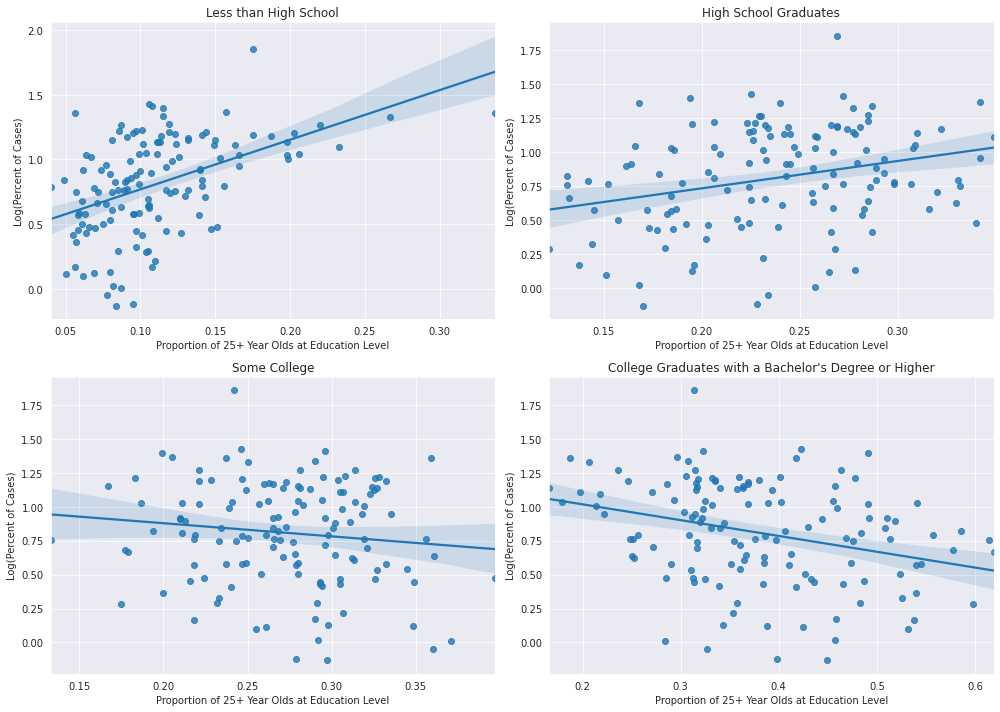

In [13]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 10))
ax = [ax1, ax2, ax3, ax4]

columns = ['EDUCATIONAL_ATTAINMENT_Less_Than_High_School_Graduate', 'EDUCATIONAL_ATTAINMENT_High_School_Graduate',
        'EDUCATIONAL_ATTAINMENT_Some_College', 'EDUCATIONAL_ATTAINMENT_Bachelors_Degree_or_Higher']

readable = ['Proportion of 25+ Year Olds Less than High School', 'Proportion of 25+ Year Olds High School Graduates', 'Proportion of 25+ Year Olds Some College', 'Proportion of 25+ Year Olds College Graduates with a Bachelor\'s Degree or Higher']

for i in np.arange(4):
  # Fill in the x and y axis.
  x = merged[columns[i]]
  y = np.log(merged['percent_cases'])

  # Calculate the r**2 value.
  r2 = np.corrcoef(x, y)[1][0]

  # Regression plot.
  sns.regplot(x, y, ax = ax[i])
  ax[i].set_ylabel('Log(Percent of Cases)');
  ax[i].set_xlabel('Proportion of 25+ Year Olds at Education Level');
  ax[i].set_title(readable[i].replace('Proportion of 25+ Year Olds ', ''))
  print(f"Correlation of {r2}")

  # Add values to our dictionary.
  r_values[readable[i]] = r2

plt.tight_layout()

## Age

This sees if there is a correlation between a county's median age and the percent of COVID-19 cases in that county.

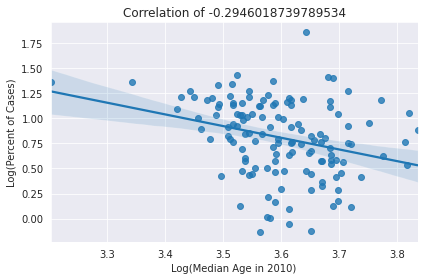

In [14]:
plt.plot(figsize=(14, 10))

# Fill in the x and y axis.
x = np.log(merged['MedianAge2010'])
y = np.log(merged['percent_cases'])

# Calculate the r**2 value.
r2 = np.corrcoef(x, y)[1][0]

# Regression plot.
sns.regplot(x, y, ax)

plt.xlabel('Log(Median Age in 2010)')
plt.ylabel('Log(Percent of Cases)')
plt.title(f"Correlation of {r2}")

# Add values to our dictionary.
r_values['Median Age in 2010'] = r2

plt.tight_layout()

## Disability Status

This sees if there is a correlation between the proportion of those in a county that have disability status and the percent of COVID-19 cases in that county. We find this correlation amongst the entire population, as well as exclusively amongst the elderly population.

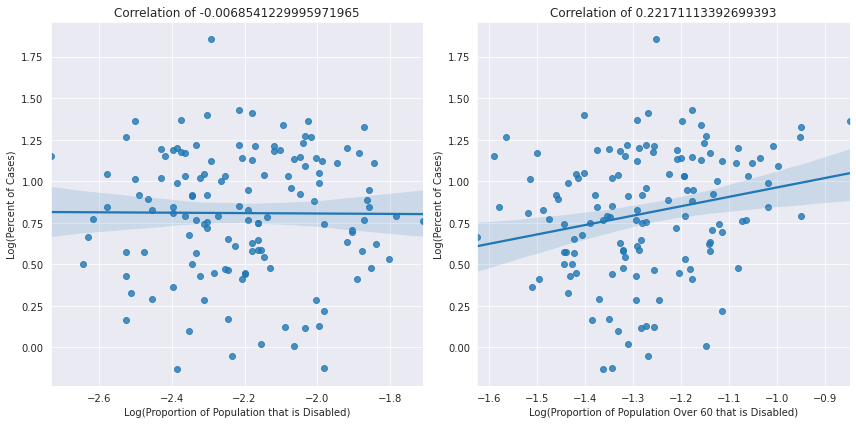

In [15]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,6))
ax = [ax1, ax2]
dfs = [merged, over_60]
readable = ['Proportion of Population that is Disabled', 'Proportion of Population Over 60 that is Disabled']

for i in np.arange(len(readable)):
# Fill in the x and y axis.
  x = np.log(dfs[i]['DISABILITY_STATUS_Yes'])
  y = np.log(dfs[i]['percent_cases'])

  # Calculate the r**2 value.
  r2 = np.corrcoef(x, y)[1][0]

  # Regression plot.
  sns.regplot(x, y, ax = ax[i])
  ax[i].set_ylabel('Log(Percent of Cases)');
  ax[i].set_xlabel('Log(' + readable[i] + ')');
  ax[i].set_title(f"Correlation of {r2}")

  # Add values to our dictionary.
  r_values['Disability Status '+str(readable[i])] = r2

  plt.tight_layout()

## Language Barriers

The dataset gave us the proportion of the dominant language in each county. This included:
- English
- Limited English
- A language other than English

Using this information, we analyzed whether this feature would be correlated with the percentage of COVID-19 cases in each county.

In [16]:
def plot_language_barriers(merged, col_name, y_label):
  merged = merged[merged[col_name].notna()]

  # Language other than English
  fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(25,5))

  x = merged['LANGUAGE_Other_Than_ English']
  y = np.log(merged[col_name])

  ax1.scatter(x=x, y=y)
  ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
  ax1.set_xlabel('Proportion of Non-English Speakers')
  ax1.set_ylabel(y_label)
  ax1.set_title('Language Other than English')
  print('Correlation Other Language: ', np.corrcoef(x,y)[0][1])

  # Add values to our dictionary.
  r_values['Primary Language Other than English'] = np.corrcoef(x,y)[0][1]

  # Language is limited English
  x = merged['LANGUAGE_Limited_English']

  ax2.scatter(x=x, y=y)
  ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
  ax2.set_xlabel('Proportion of Limited English Speakers')
  ax2.set_ylabel(y_label)
  ax2.set_title('Limited English')
  print('Correlation Limited English: ', np.corrcoef(x,y)[0][1]);

  # Add values to our dictionary.
  r_values['Primary Language Limited English'] = np.corrcoef(x,y)[0][1]

  # Language is English only
  x = merged['LANGUAGE_English_Only']
    
  ax3.scatter(x=x, y=y)
  ax3.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
  ax3.set_xlabel('Proportion of Native English Speakers')
  ax3.set_ylabel(y_label)
  ax3.set_title('English Only')
  print('Correlation English Only: ', np.corrcoef(x,y)[0][1], '\n')

  # Add values to our dictionary.
  r_values['Primary Language English'] = np.corrcoef(x,y)[0][1]

Correlation Other Language:  0.3541400437131953
Correlation Limited English:  0.39733396881757965
Correlation English Only:  -0.3541400437131951 



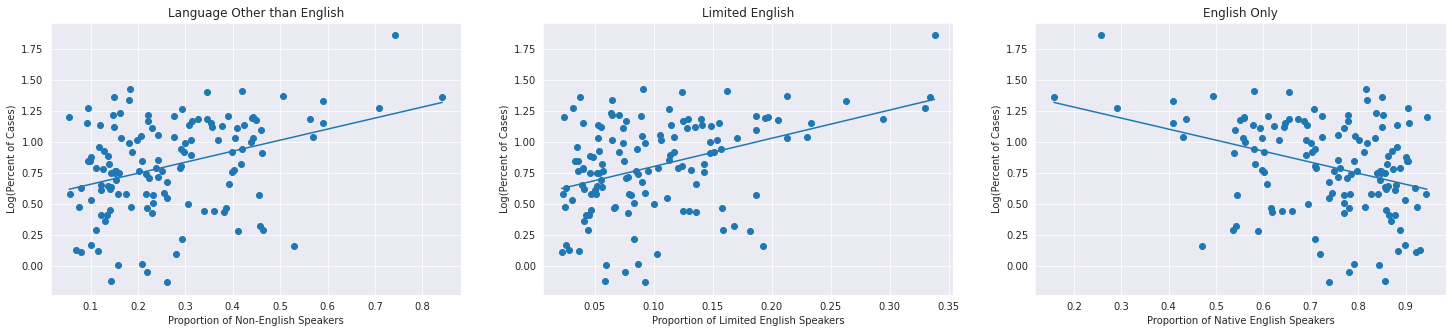

In [17]:
plot_language_barriers(merged, 'percent_cases', 'Log(Percent of Cases)')

## Access to Healthcare

We used three metrics to gauge a county's relevant access to healthcare: 
1. The number of people per doctor.
2. The number of people per hospital.
3. The number of people per ICU bed.


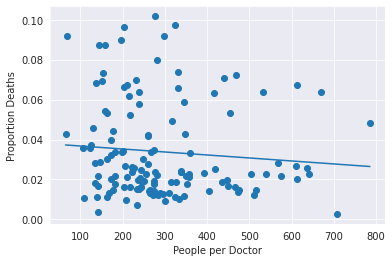

Correlation:  -0.09008144638711649


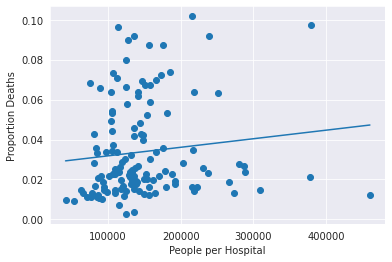

Correlation:  0.11655842308721576


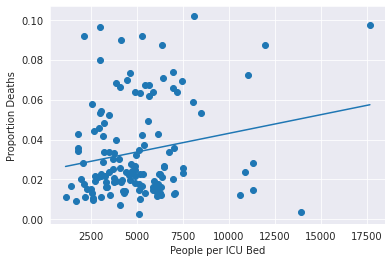

Correlation:  0.1970762408566156


In [18]:
access_to_healthcare = ['People per Doctor', 'People per Hospital', 'People per ICU Bed']

merged['People per Doctor'] = merged['PopulationEstimate2018'] / merged["TotalM.D.'s,TotNon-FedandFed2017"]
merged['People per Hospital'] = merged['PopulationEstimate2018'] / merged['#Hospitals']
merged['People per ICU Bed'] = merged['PopulationEstimate2018'] / merged['#ICU_beds']
merged['Proportion Deaths'] = merged['tot_deaths'] / merged['tot_cases']

i = 0
for access_measurement in access_to_healthcare:

  merged = merged[merged[access_measurement].isna() == False]
  merged = merged[merged['Proportion Deaths'].isna() == False]

  x = merged[access_measurement]
  y = merged['Proportion Deaths']

  plt.scatter(x=x, y=y)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

  plt.xlabel(access_measurement)
  plt.ylabel('Proportion Deaths')
  plt.show()
  print('Correlation: ', np.corrcoef(x, y)[0][1])

  r_values[access_to_healthcare[i]] = np.corrcoef(x, y)[0][1]
  i += 1

Healthcare Access as it Relates to Language Barriers

Correlation Other Language:  0.12964596492925703
Correlation Limited English:  0.0978398452223274
Correlation English Only:  -0.12964596492925703 



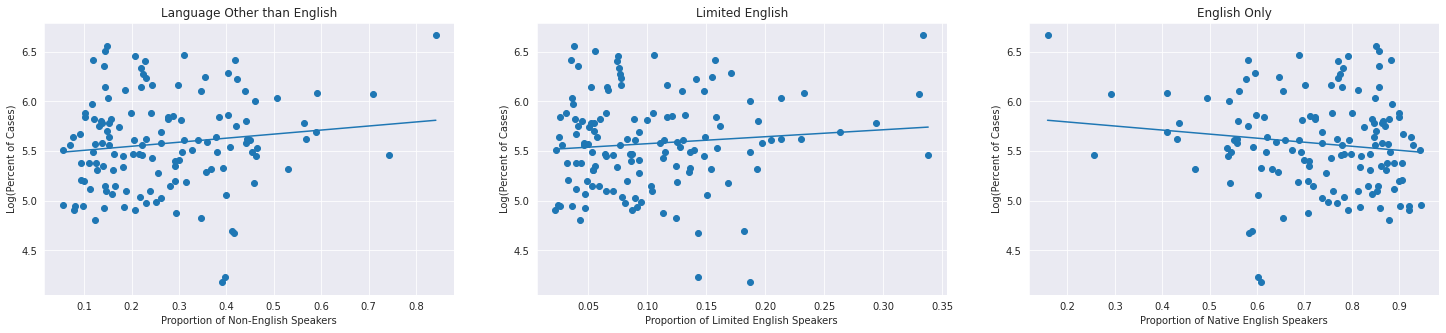

In [19]:
plot_language_barriers(merged, 'People per Doctor', 'Log(Percent of Cases)')

Correlation Other Language:  0.18886655840990282
Correlation Limited English:  0.1862006717059074
Correlation English Only:  -0.18886655840990288 



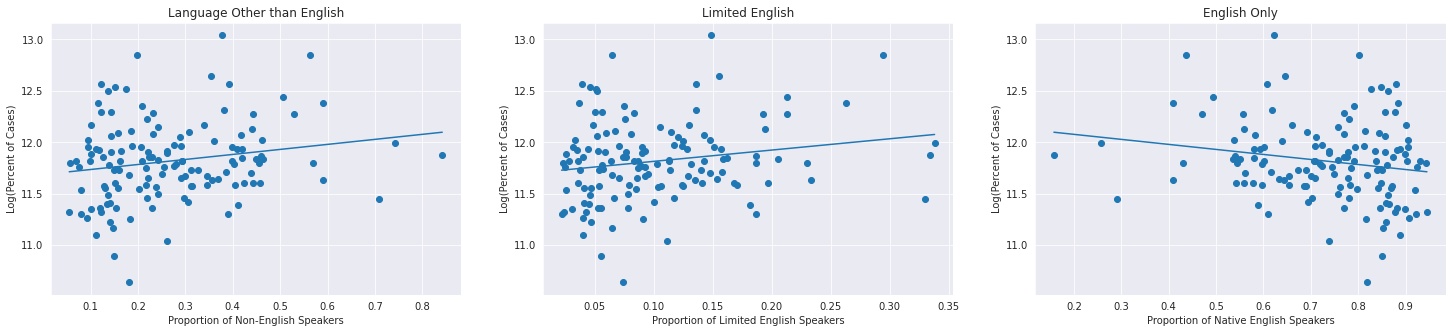

In [20]:
plot_language_barriers(merged, 'People per Hospital', 'Log(Percent of Cases)')

Correlation Other Language:  0.2076882547150364
Correlation Limited English:  0.17765668316840402
Correlation English Only:  -0.2076882547150364 



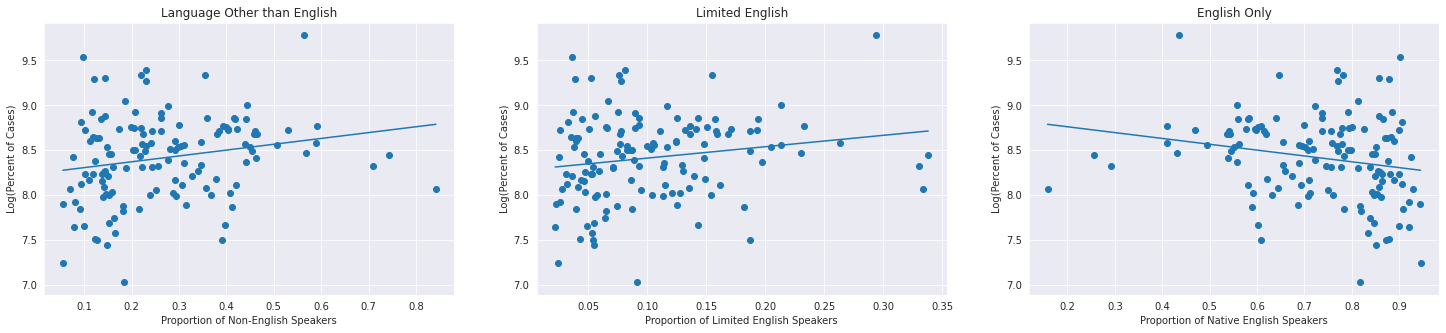

In [21]:
plot_language_barriers(merged, 'People per ICU Bed', 'Log(Percent of Cases)')

Access to Healthcare as it Relates to Race

In [22]:
races = ['RACE_White', 'RACE_Hispanic_Latino', 'RACE_Black', 'RACE_Asian',
        'RACE_Native_Hawaiian_Other_Pacific_Islander', 'RACE_American_Indian_ Alaska_Native', 'RACE_ Other']
accessibilities = ['People per Doctor', 'People per Hospital', 'People per ICU Bed']


for race in races:
  for accessibility in accessibilities:
    x = merged[race]
    y = merged[accessibility]
    corrcoef = np.corrcoef(x, y)[0][1]
    print('Correlation between', race, 'and', accessibility, ':', corrcoef)

Correlation between RACE_White and People per Doctor : 0.279305517144074
Correlation between RACE_White and People per Hospital : -0.24127305413886482
Correlation between RACE_White and People per ICU Bed : 0.009040938627135004
Correlation between RACE_Hispanic_Latino and People per Doctor : 0.30805146351607404
Correlation between RACE_Hispanic_Latino and People per Hospital : 0.035979884991495986
Correlation between RACE_Hispanic_Latino and People per ICU Bed : 0.010479825616957707
Correlation between RACE_Black and People per Doctor : -0.28574890502780126
Correlation between RACE_Black and People per Hospital : 0.1521795507906282
Correlation between RACE_Black and People per ICU Bed : -0.2272842422926541
Correlation between RACE_Asian and People per Doctor : -0.1857044191332245
Correlation between RACE_Asian and People per Hospital : 0.14926642434116716
Correlation between RACE_Asian and People per ICU Bed : 0.26644479998648757
Correlation between RACE_Native_Hawaiian_Other_Pacific_I

## Race

We explored the correlation of the proportion of COVID-19 cases per county with the proportion of different racial/ethnic groups for that corresponding county. We chose six main subgroups of:
- White
- Black
- Asian 
- Native Hawaiian or Other Pacific Islander
- Hispanic 
- Other

Correlation of White:  -0.21406637715566917
Correlation of Hispanic/Latino:  0.39702227140015306
Correlation of Black:  0.31802371031985527
Correlation of Asian:  -0.2600787503264789
Correlation of Pacific Islander:  -0.2373208469757293
Correlation of American_Indian:  -0.02087227322490587
Correlation of Other:  0.3260679781815471


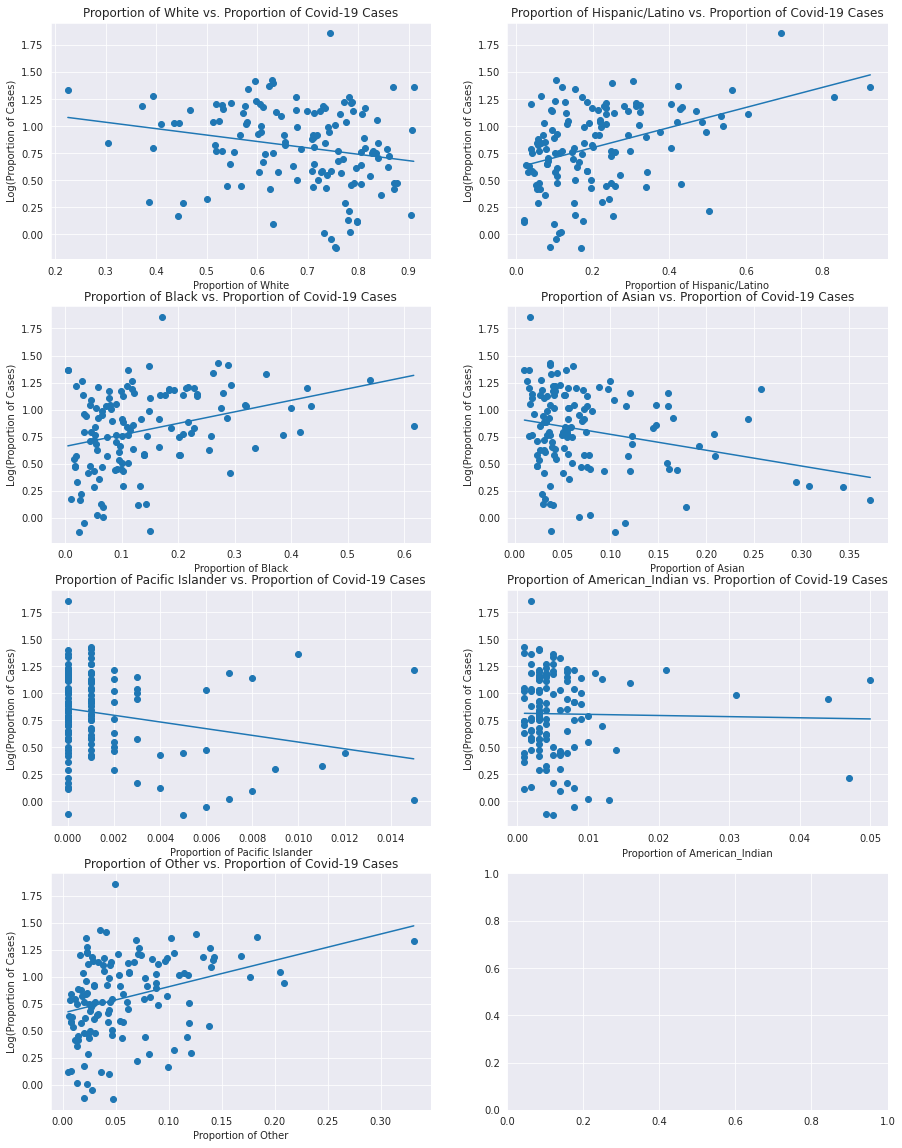

In [23]:
col_name = 'percent_cases'
y_label = 'Log(Proportion of Cases)'

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(15,20))

# White
x = merged['RACE_White']
y = np.log(merged[col_name])

ax1.scatter(x=x, y=y)
ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax1.set_xlabel('Proportion of White')
ax1.set_ylabel(y_label)
ax1.set_title('Proportion of White vs. Proportion of Covid-19 Cases')
print('Correlation of White: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of White'] = np.corrcoef(x, y)[0][1]

# Hispanic or Latino
x = merged['RACE_Hispanic_Latino']
y = np.log(merged[col_name])

ax2.scatter(x=x, y=y)
ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax2.set_xlabel('Proportion of Hispanic/Latino')
ax2.set_ylabel(y_label)
ax2.set_title('Proportion of Hispanic/Latino vs. Proportion of Covid-19 Cases')
print('Correlation of Hispanic/Latino: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of Hispanic or Latino'] = np.corrcoef(x, y)[0][1]

# Black
x = merged['RACE_Black']
y = np.log(merged[col_name])

ax3.scatter(x=x, y=y)
ax3.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax3.set_xlabel('Proportion of Black')
ax3.set_ylabel(y_label)
ax3.set_title('Proportion of Black vs. Proportion of Covid-19 Cases')
print('Correlation of Black: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of Black'] = np.corrcoef(x, y)[0][1]

# Asian
x = merged['RACE_Asian']
y = np.log(merged[col_name])

ax4.scatter(x=x, y=y)
ax4.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax4.set_xlabel('Proportion of Asian')
ax4.set_ylabel(y_label)
ax4.set_title('Proportion of Asian vs. Proportion of Covid-19 Cases')
print('Correlation of Asian: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of Asian'] = np.corrcoef(x, y)[0][1]

# Pacific Islander
x = merged['RACE_Native_Hawaiian_Other_Pacific_Islander']
y = np.log(merged[col_name])

ax5.scatter(x=x, y=y)
ax5.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax5.set_xlabel('Proportion of Pacific Islander')
ax5.set_ylabel(y_label)
ax5.set_title('Proportion of Pacific Islander vs. Proportion of Covid-19 Cases')
print('Correlation of Pacific Islander: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of Native Hawaiian or Other Pacific Islander'] = np.corrcoef(x, y)[0][1]

# American Indian or Alaska Native
x = merged['RACE_American_Indian_ Alaska_Native']
y = np.log(merged[col_name])

ax6.scatter(x=x, y=y)
ax6.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax6.set_xlabel('Proportion of American_Indian')
ax6.set_ylabel(y_label)
ax6.set_title('Proportion of American_Indian vs. Proportion of Covid-19 Cases')
print('Correlation of American_Indian: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of American Indian'] = np.corrcoef(x, y)[0][1]

# Other
x = merged['RACE_ Other']
y = np.log(merged[col_name])

ax7.scatter(x=x, y=y)
ax7.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
ax7.set_xlabel('Proportion of Other')
ax7.set_ylabel(y_label)
ax7.set_title('Proportion of Other vs. Proportion of Covid-19 Cases')
print('Correlation of Other: ', np.corrcoef(x, y)[0][1])

r_values['Proportion of Other Race/Ethnicity'] = np.corrcoef(x, y)[0][1]

## Income

In [24]:
def plot_relationship(merged, col_name, x_label):
  merged = merged[merged[col_name].isna() == False]

  x = merged[col_name]
  y = np.log(merged['percent_cases'])
  plt.scatter(x=x, y=y)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
  plt.xlabel(x_label)
  plt.ylabel('Percent Cases in 2020')
  plt.show()
  print('Correlation: ', np.corrcoef(x,y)[0][1]);

In [25]:
merged['Proportion Enrolled Medicare'] = merged['MedicareEnrollment,AgedTot2017']/merged['#EligibleforMedicare2018']

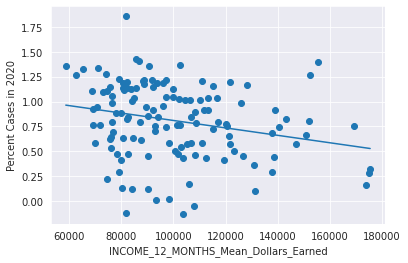

Correlation:  -0.24665498637114153


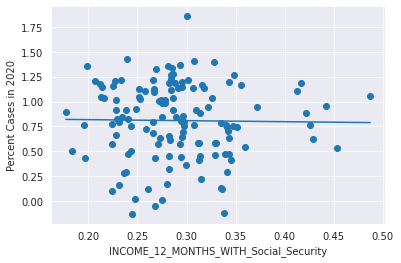

Correlation:  -0.015310596284049061


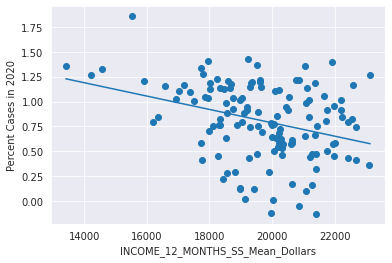

Correlation:  -0.325792738475893


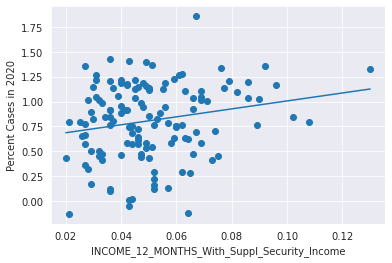

Correlation:  0.20298622473941028


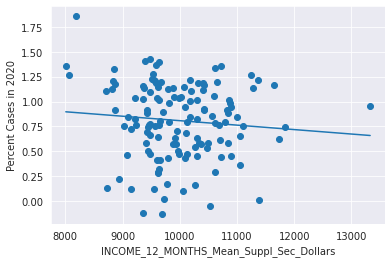

Correlation:  -0.09307214866982667


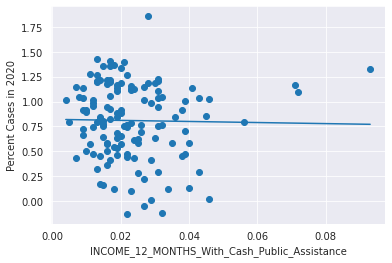

Correlation:  -0.018736464767426016


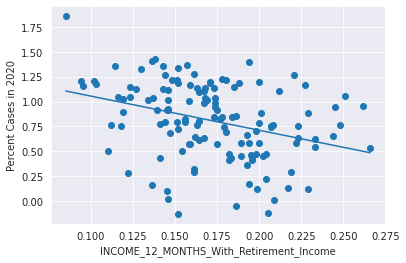

Correlation:  -0.33417528907631294


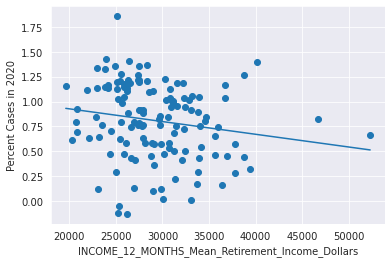

Correlation:  -0.17181742775213132


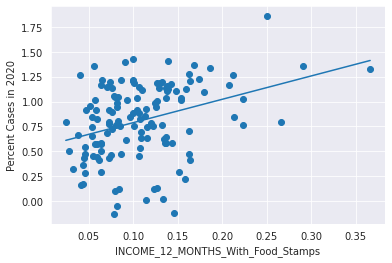

Correlation:  0.3410836745679147


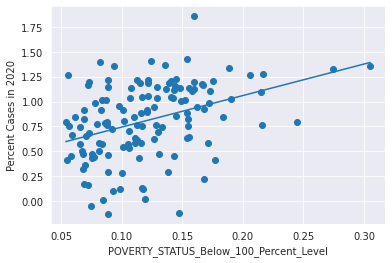

Correlation:  0.37963138983658995


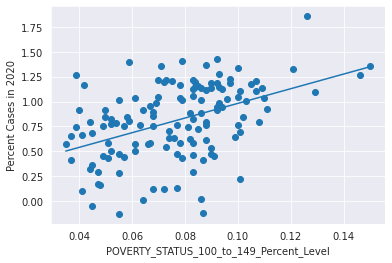

Correlation:  0.44457422768953764


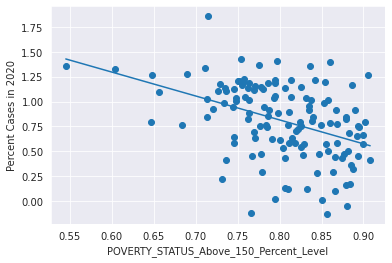

Correlation:  -0.4166119390694088


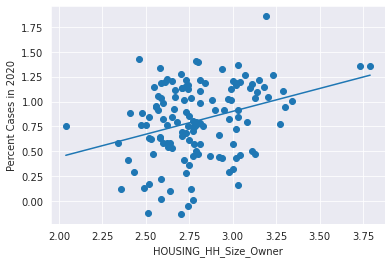

Correlation:  0.31579611085399284


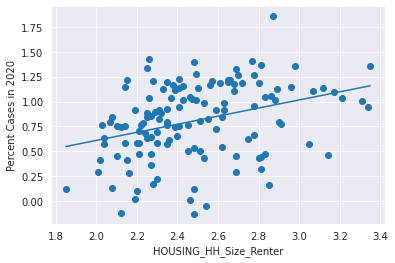

Correlation:  0.33616423764504655


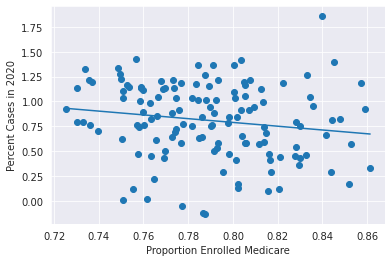

Correlation:  -0.15970518067134418


In [26]:
income_columns = ['INCOME_12_MONTHS_Mean_Dollars_Earned', 
                  'INCOME_12_MONTHS_WITH_Social_Security',
                  'INCOME_12_MONTHS_SS_Mean_Dollars', 
                  'INCOME_12_MONTHS_With_Suppl_Security_Income',
                  'INCOME_12_MONTHS_Mean_Suppl_Sec_Dollars', 
                  'INCOME_12_MONTHS_With_Cash_Public_Assistance',
                  #'INCOME_12_MONTHS_Mean_Cash_Public_Assistance_Dollars', 
                  'INCOME_12_MONTHS_With_Retirement_Income',
                  'INCOME_12_MONTHS_Mean_Retirement_Income_Dollars',
                  'INCOME_12_MONTHS_With_Food_Stamps', 
                  'POVERTY_STATUS_Below_100_Percent_Level',
                  'POVERTY_STATUS_100_to_149_Percent_Level', 
                  'POVERTY_STATUS_Above_150_Percent_Level',
                  'HOUSING_HH_Size_Owner',
                  'HOUSING_HH_Size_Renter',
                  #'HOUSING_OVER_1_Occupant_Per_Room',
                  'Proportion Enrolled Medicare'
                  ]

for col in income_columns:
   plot_relationship(merged, col, col)

## Unemployment

This cell explores the correlation betweenthe unemployment rate of a county and its corresponding proportion of COVID-19 cases.

Correlation:  0.26823840277438427


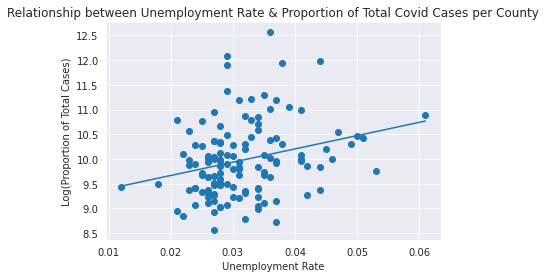

In [27]:
data_subset = merged['EMPLOYMENT_STATUS_Unemployed']

col_name = 'tot_cases'
y_label = 'Log(Proportion of Total Cases)'

plt.plot(figsize=(14, 10))

x = data_subset
y = np.log(merged[col_name])

plt.scatter(x=x, y=y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel("Unemployment Rate")
plt.ylabel(y_label)
plt.title("Relationship between Unemployment Rate & Proportion of Total Covid Cases per County")
print('Correlation: ', np.corrcoef(x,y)[0][1])

r_values['Unemployment Rate'] = np.corrcoef(x,y)[0][1]

# Visualizing Disparities Over Time


### General Function

We chose to plot the difference between the 25th and 75th percentile of certain demographics over time to see if there was a clear difference in the growth rate of COVID-19 cases among different demographics. We analyzed four main features:
1. Race
2. Level of education
3. Language barriers
4. Socioeconomic status

In [28]:
def plot_quartiles_over_time(disparities_df, group):
  statistics = disparities_df[group].describe()

  condition_1 = disparities_df[group] <= statistics['25%']
  q1 = disparities_df[condition_1].iloc[:, :-1]

  condition_1 = disparities_df[group] > statistics['25%']
  condition_2 = disparities_df[group] <= statistics['50%']
  q2 = disparities_df[condition_1 & condition_2].iloc[:, :-1]

  condition_1 = disparities_df[group] > statistics['50%']
  condition_2 = disparities_df[group] <= statistics['75%']
  q3 = disparities_df[condition_1 & condition_2].iloc[:, :-1]

  condition_1 = disparities_df[group] > statistics['75%']
  q4 = disparities_df[condition_1].iloc[:, :-1]

  quartile_case_proportions = pd.DataFrame({'Quartile 1': q1.mean(),
                                            'Quartile 2': q2.mean(),
                                            'Quartile 3': q3.mean(),
                                            'Quartile 4': q4.mean()})

  fig, axes = plt.subplots(1, 1, figsize=(15,5))
  quartile_case_proportions.plot(ax=axes)
  plt.title(group)
  plt.xlabel('Time')
  plt.ylabel('Proportion of Population w/ Covid')
  plt.show();

In [29]:
cases_data = merged.iloc[:, 88:356].div(merged['PopulationEstimate2018'], axis=0)
cases_data.columns = [name.replace('#Cases_', '') for name in cases_data.columns]

### Racial Disparities

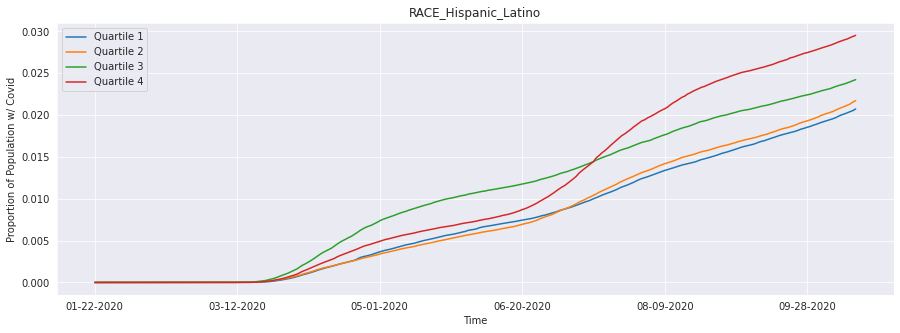

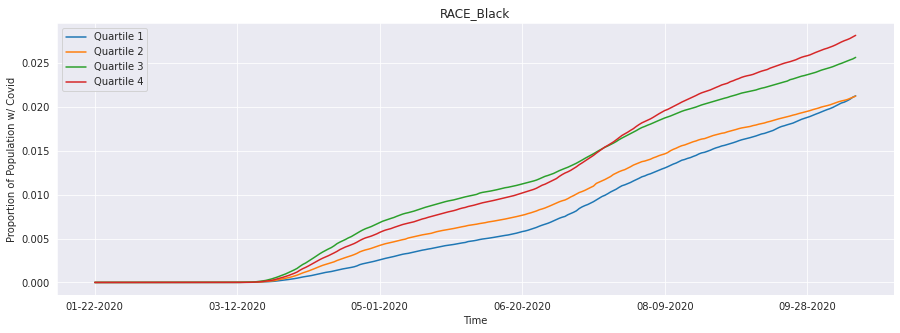

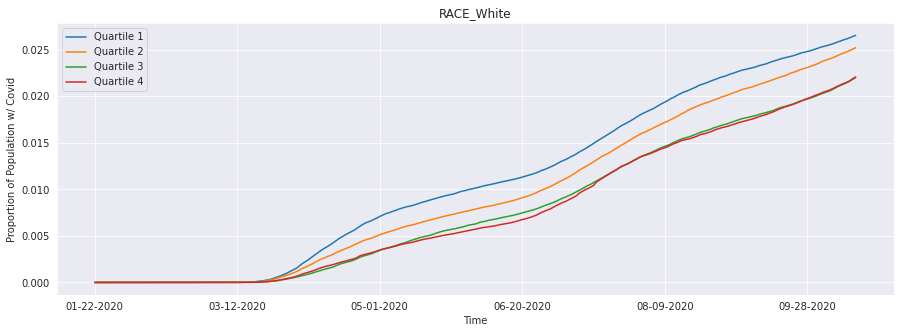

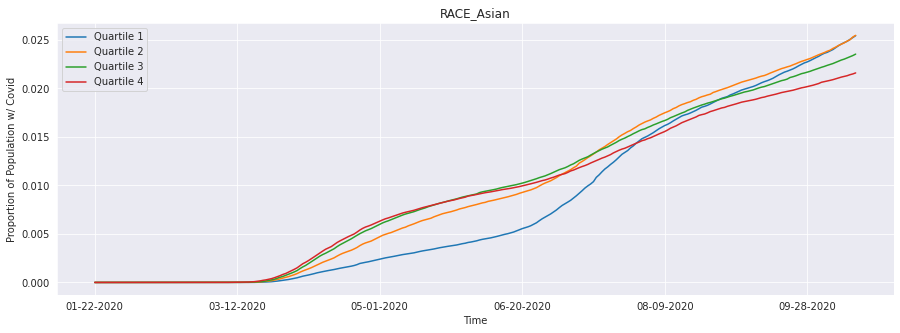

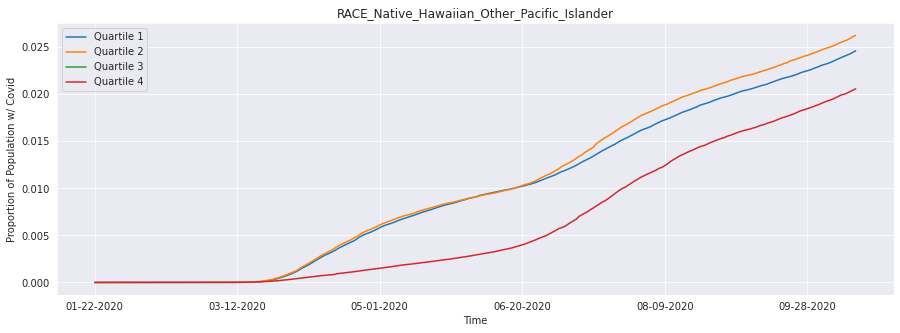

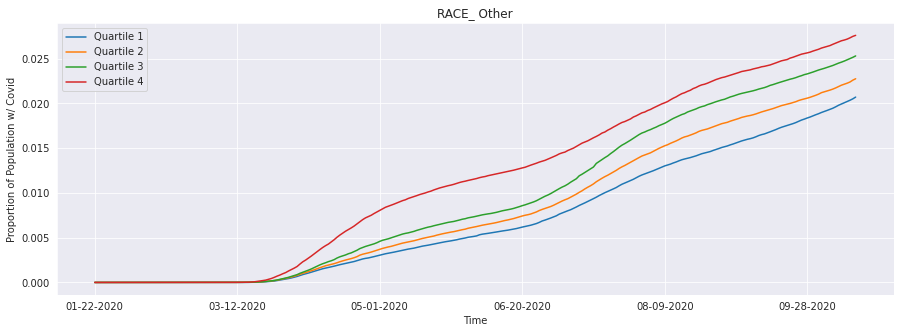

In [30]:
race_columns = ['RACE_Hispanic_Latino', 'RACE_Black', 'RACE_White', 'RACE_Asian', 'RACE_Native_Hawaiian_Other_Pacific_Islander', 'RACE_ Other']
race_data = merged[race_columns]
racial_disparities = pd.concat([cases_data, race_data], axis=1)

for race in race_columns:
  disparities_selected = pd.concat([racial_disparities.iloc[:, :-6], racial_disparities[race]], axis=1)
  plot_quartiles_over_time(disparities_selected, race)

### Educational Disparities

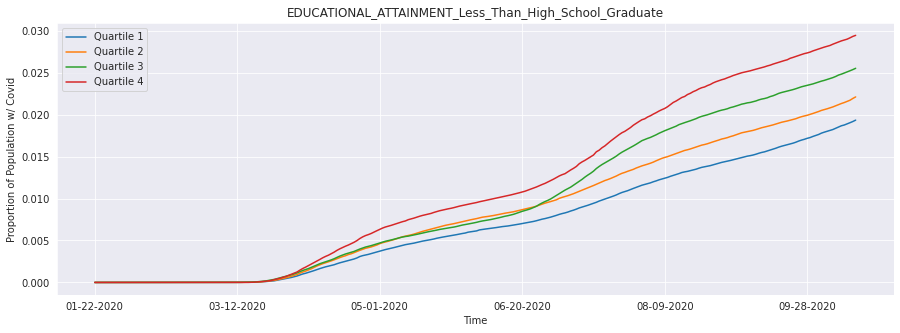

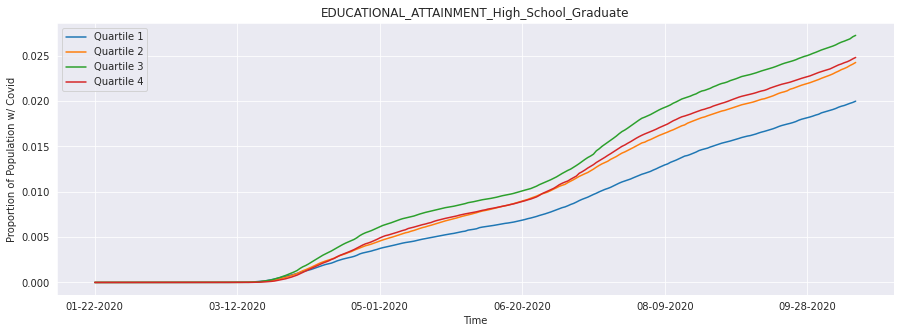

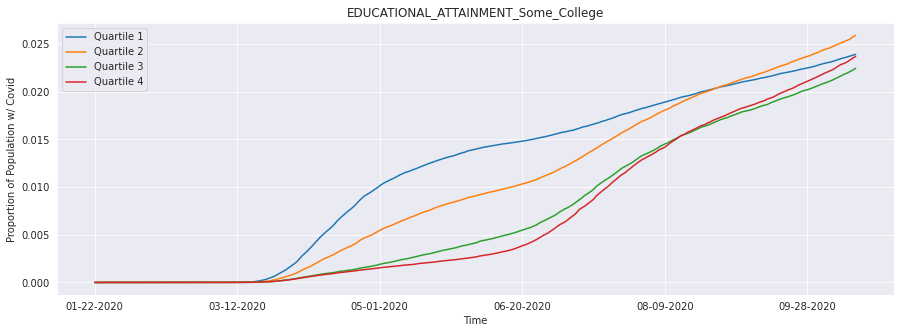

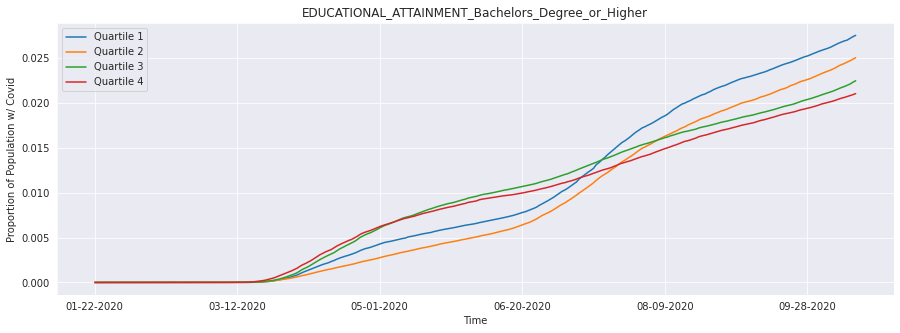

In [31]:
edu_columns = ['EDUCATIONAL_ATTAINMENT_Less_Than_High_School_Graduate','EDUCATIONAL_ATTAINMENT_High_School_Graduate',
               'EDUCATIONAL_ATTAINMENT_Some_College', 'EDUCATIONAL_ATTAINMENT_Bachelors_Degree_or_Higher']
edu_data = merged[edu_columns]
edu_disparities = pd.concat([cases_data, edu_data], axis=1)

for edu in edu_columns:
  disparities_selected = pd.concat([edu_disparities.iloc[:, :-4], edu_disparities[edu]], axis=1)
  plot_quartiles_over_time(disparities_selected, edu)

### Language Barrier Disparities

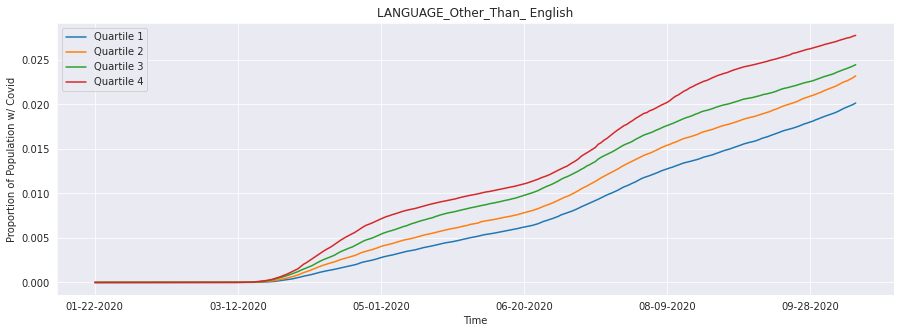

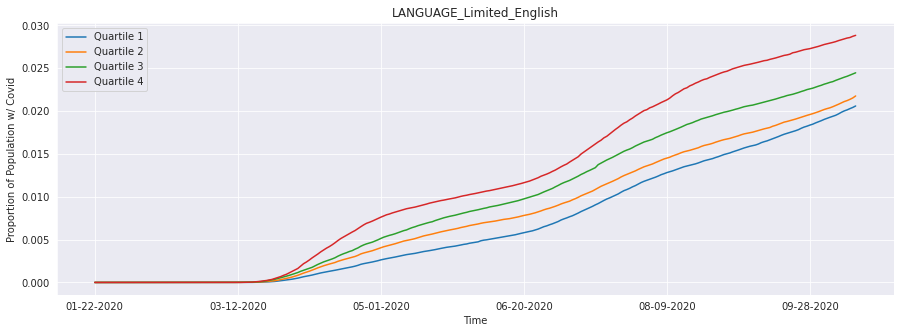

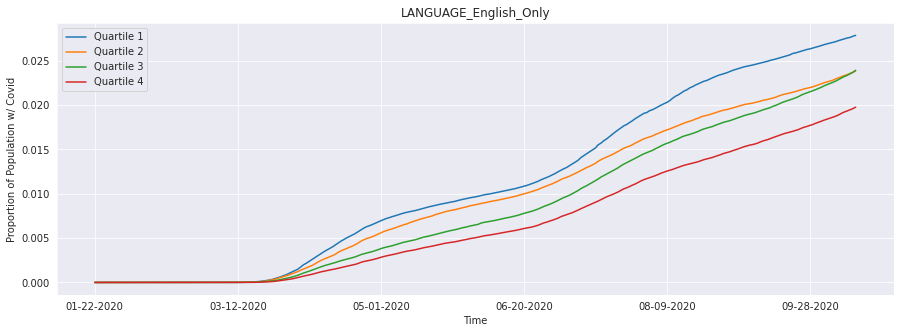

In [32]:
lang_columns = ['LANGUAGE_Other_Than_ English', 'LANGUAGE_Limited_English', 'LANGUAGE_English_Only']
lang_data = merged[lang_columns]
lang_disparities = pd.concat([cases_data, lang_data], axis=1)

for lang in lang_columns:
  disparities_selected = pd.concat([lang_disparities.iloc[:, :-4], lang_disparities[lang]], axis=1)
  plot_quartiles_over_time(disparities_selected, lang)

### Economic Disparities

In [33]:
income_columns = ['INCOME_12_MONTHS_Mean_Dollars_Earned', 
                  'INCOME_12_MONTHS_WITH_Social_Security',
                  'INCOME_12_MONTHS_SS_Mean_Dollars', 
                  'INCOME_12_MONTHS_With_Suppl_Security_Income',
                  'INCOME_12_MONTHS_Mean_Suppl_Sec_Dollars', 
                  'INCOME_12_MONTHS_With_Cash_Public_Assistance',
                  #'INCOME_12_MONTHS_Mean_Cash_Public_Assistance_Dollars', 
                  'INCOME_12_MONTHS_With_Retirement_Income',
                  'INCOME_12_MONTHS_Mean_Retirement_Income_Dollars',
                  'INCOME_12_MONTHS_With_Food_Stamps', 
                  'POVERTY_STATUS_Below_100_Percent_Level',
                  'POVERTY_STATUS_100_to_149_Percent_Level', 
                  'POVERTY_STATUS_Above_150_Percent_Level',
                  'HOUSING_HH_Size_Owner',
                  'HOUSING_HH_Size_Renter',
                  #'HOUSING_OVER_1_Occupant_Per_Room',
                  'Proportion Enrolled Medicare'
                  ]

In [34]:
merged['Proportion Enrolled Medicare'] = merged['MedicareEnrollment,AgedTot2017'] / merged['#EligibleforMedicare2018']

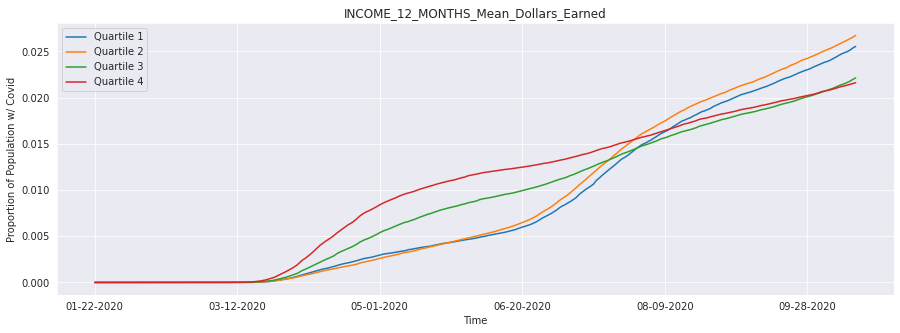

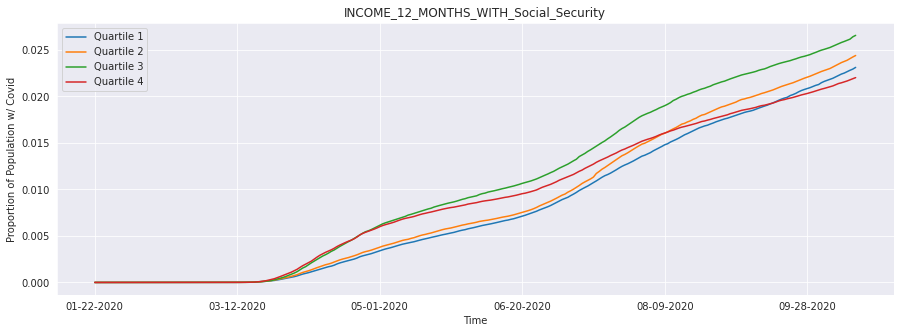

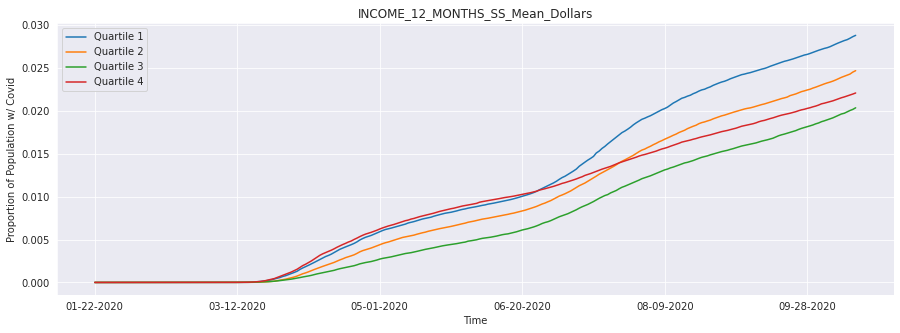

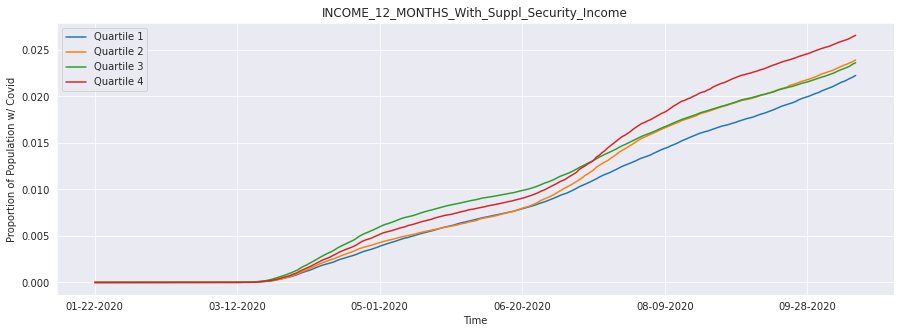

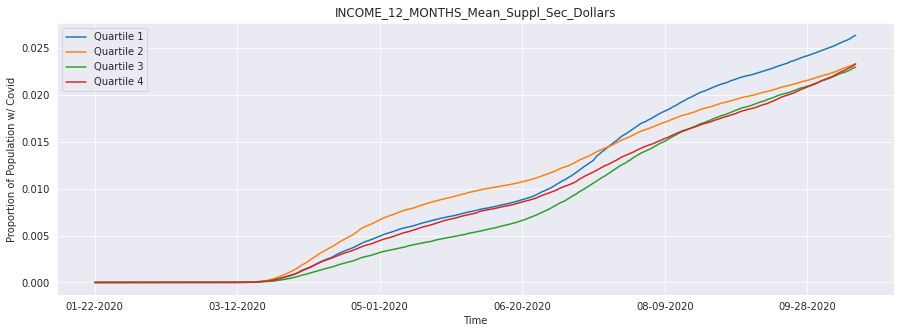

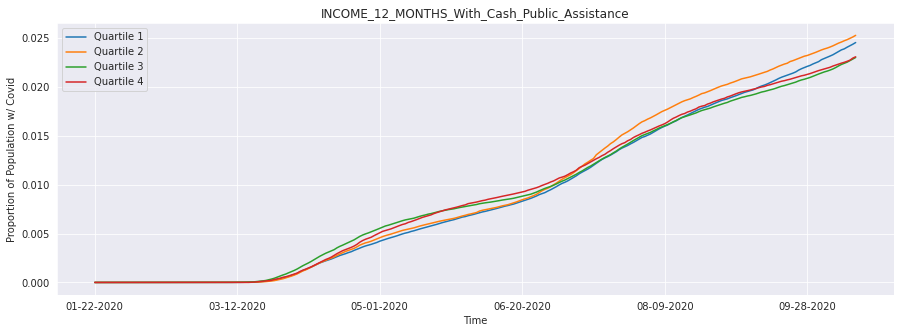

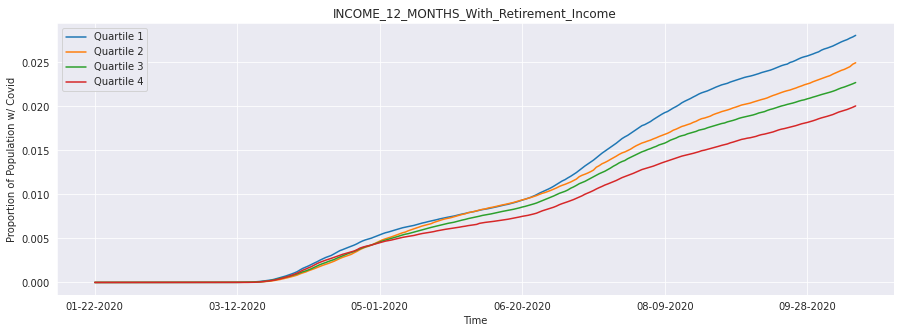

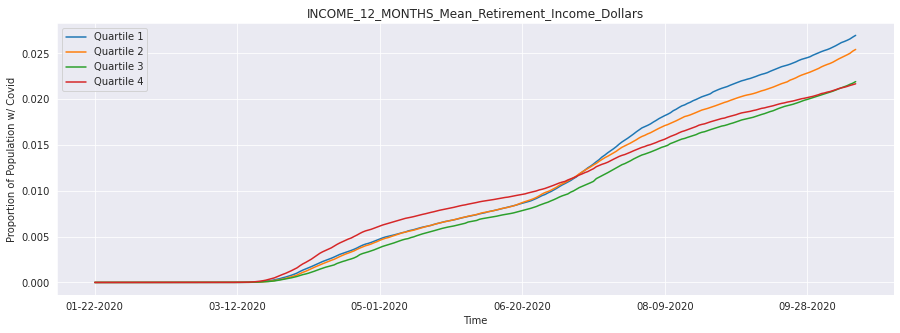

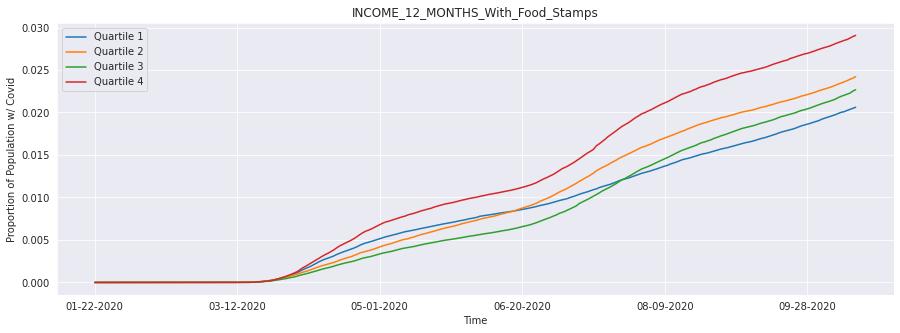

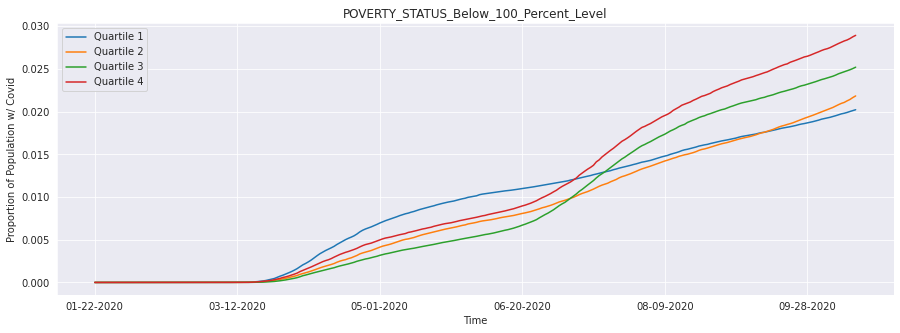

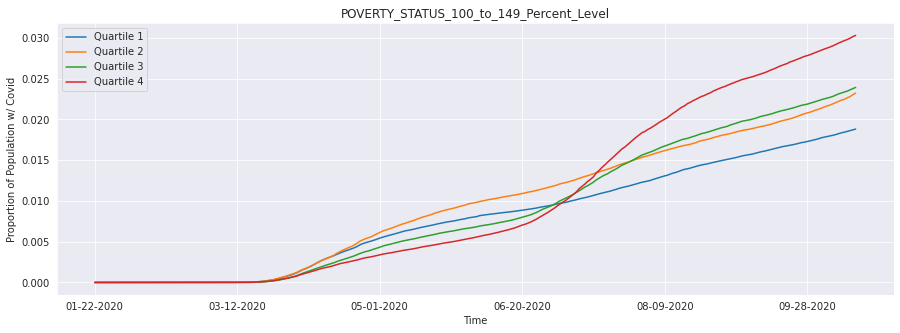

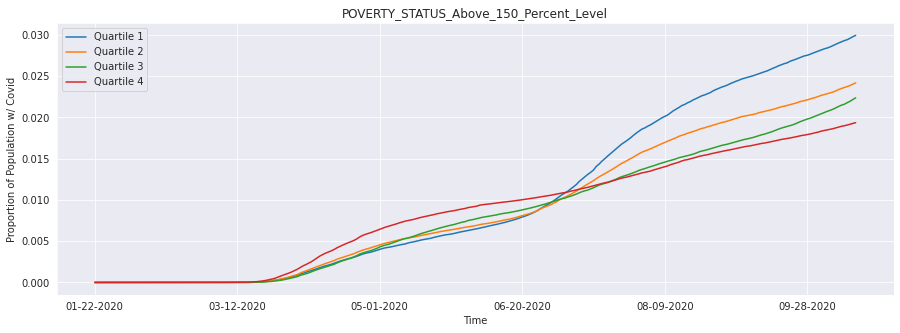

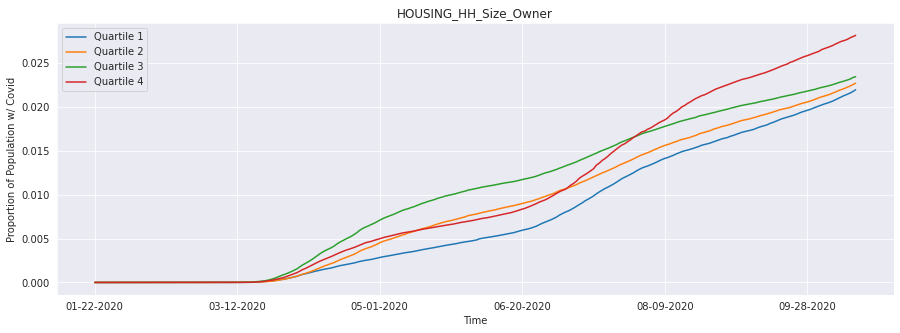

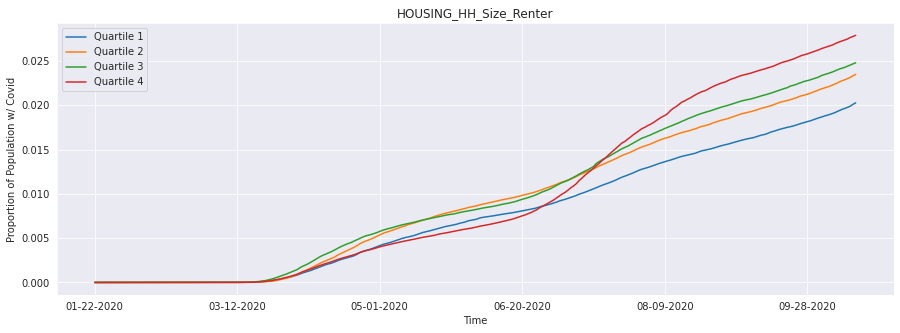

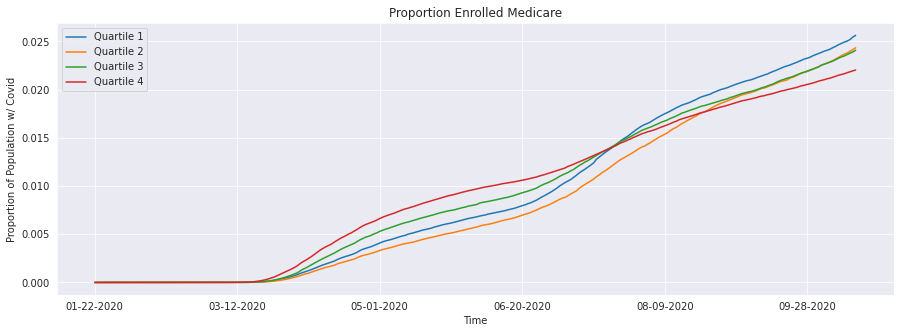

In [35]:
econ_data = merged[income_columns]
econ_disparities = pd.concat([cases_data, econ_data], axis=1)

for econ in income_columns:
  disparities_selected = pd.concat([econ_disparities.iloc[:, :-len(income_columns)], econ_disparities[econ]], axis=1)
  plot_quartiles_over_time(disparities_selected, econ)

# Conclusion

In the above cells, we calculated the correlation between the total number of COVID-19 cases and features such as race, education level, or the county's average access to healthcare. 

Now let's print out our collected $R$ values. 

In [36]:
r_values

{'Disability Status Proportion of Population Over 60 that is Disabled': 0.22171113392699393,
 'Disability Status Proportion of Population that is Disabled': -0.0068541229995971965,
 'Median Age in 2010': -0.2946018739789534,
 'People per Doctor': -0.09008144638711649,
 'People per Hospital': 0.11655842308721576,
 'People per ICU Bed': 0.1970762408566156,
 'Primary Language English': -0.2076882547150364,
 'Primary Language Limited English': 0.17765668316840402,
 'Primary Language Other than English': 0.2076882547150364,
 "Proportion of 25+ Year Olds College Graduates with a Bachelor's Degree or Higher": -0.30546623373475823,
 'Proportion of 25+ Year Olds High School Graduates': 0.28258310744264453,
 'Proportion of 25+ Year Olds Less than High School': 0.4630421188139441,
 'Proportion of 25+ Year Olds Some College': -0.12259762585691465,
 'Proportion of American Indian': -0.02087227322490587,
 'Proportion of Asian': -0.2600787503264789,
 'Proportion of Black': 0.31802371031985527,
 'Prop

We can also visualize these. Let's summarize our findings using a bar graph.

Proportion of 25+ Year Olds Less than High School 0.4630421188139441
Proportion of Hispanic or Latino 0.39702227140015306
Proportion of Other Race/Ethnicity 0.3260679781815471
Proportion of Black 0.31802371031985527
Proportion of 25+ Year Olds High School Graduates 0.28258310744264453
Unemployment Rate 0.26823840277438427
Disability Status Proportion of Population Over 60 that is Disabled 0.22171113392699393
Primary Language Other than English 0.2076882547150364
People per ICU Bed 0.1970762408566156
Primary Language Limited English 0.17765668316840402
People per Hospital 0.11655842308721576
Disability Status Proportion of Population that is Disabled -0.0068541229995971965
Proportion of American Indian -0.02087227322490587
People per Doctor -0.09008144638711649
Proportion of 25+ Year Olds Some College -0.12259762585691465
Primary Language English -0.2076882547150364
Proportion of White -0.21406637715566917
Proportion of Native Hawaiian or Other Pacific Islander -0.2373208469757293
Propo

<BarContainer object of 21 artists>

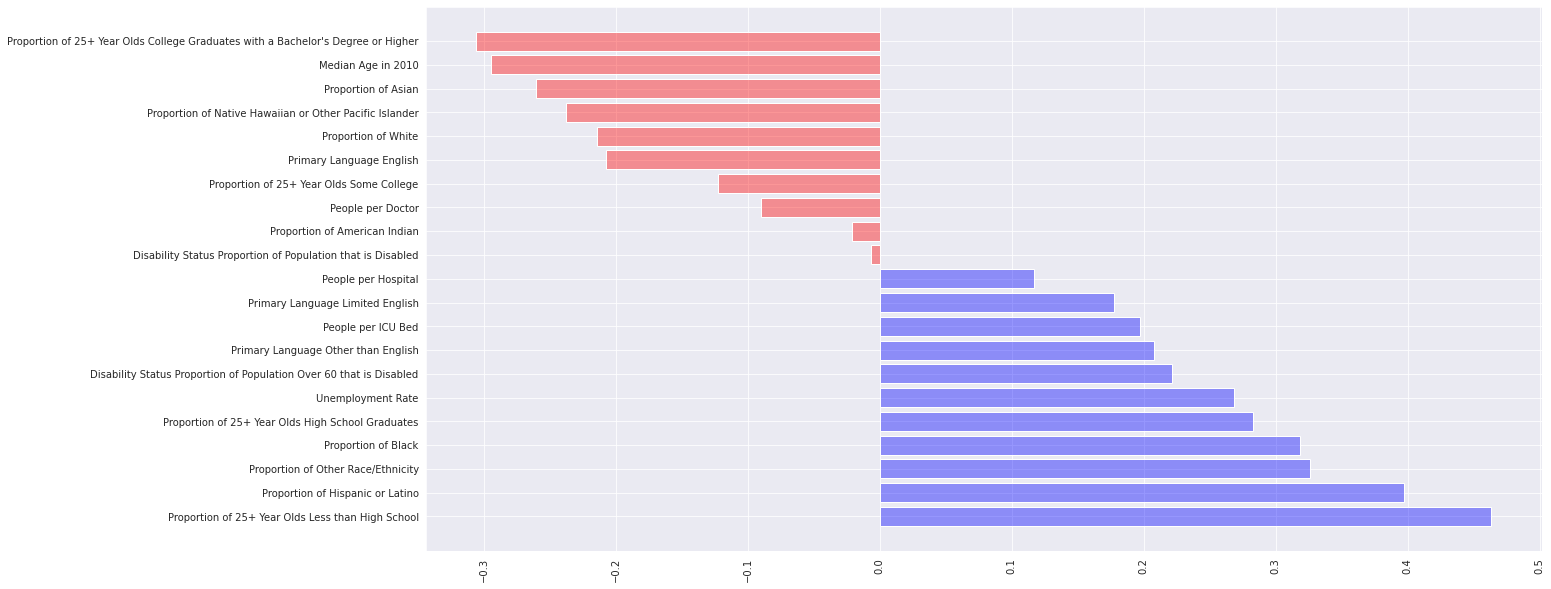

In [42]:
# R values

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

sorted_dictionary = sorted(r_values.items(), key=lambda x: x[1], reverse=True)

for i in sorted_dictionary:
	print(i[0], i[1])

sorted_labels = [ s[0] for s in sorted_dictionary ]
sorted_values = [ s[1] for s in sorted_dictionary ]

colors = []

for i in range(11):
	colors.append((0, 0, 1, .4))
 
for j in range(10):
	colors.append((1, 0, 0, .4))

plt.barh(sorted_labels, sorted_values, color=colors)

We can also graph the $R^2$ values:

Proportion of 25+ Year Olds Less than High School 0.2144080037957067
Proportion of Hispanic or Latino 0.1576266839877368
Proportion of Other Race/Ethnicity 0.10632032639540187
Proportion of Black 0.10113908032560721
Proportion of 25+ Year Olds College Graduates with a Bachelor's Degree or Higher 0.09330961995209795
Median Age in 2010 0.08679026415191113
Proportion of 25+ Year Olds High School Graduates 0.07985321261194119
Unemployment Rate 0.0719518407229528
Proportion of Asian 0.06764095637138297
Proportion of Native Hawaiian or Other Pacific Islander 0.056321184409277525
Disability Status Proportion of Population Over 60 that is Disabled 0.04915582690719344
Proportion of White 0.0458244138285532
Primary Language Other than English 0.043134411146577845
Primary Language English 0.043134411146577845
People per ICU Bed 0.03883904471017476
Primary Language Limited English 0.03156189707439869
Proportion of 25+ Year Olds Some College 0.015030177865752028
People per Hospital 0.01358586599257

<BarContainer object of 21 artists>

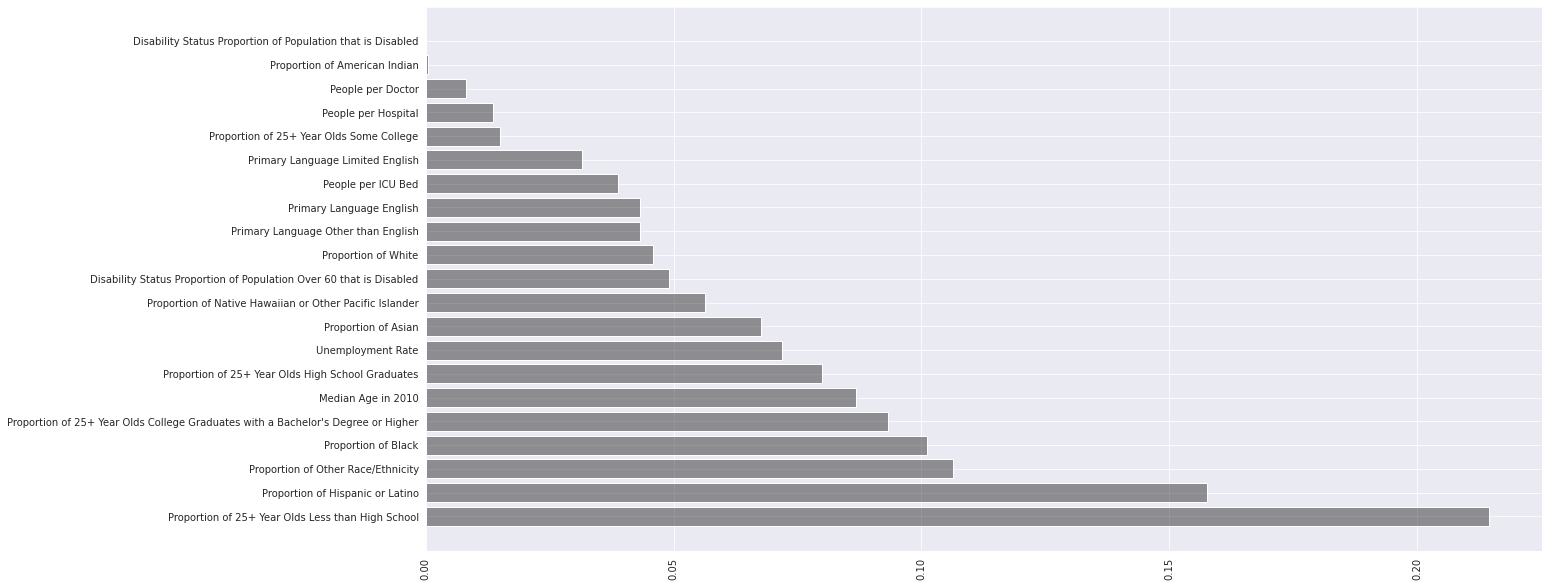

In [45]:
# R-squared values

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

r_squared_values = {key: pow(value, 2) for key, value in r_values.items()}

sorted_dictionary = sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True)

for i in sorted_dictionary:
	print(i[0], i[1])

sorted_r2labels = [ s[0] for s in sorted_dictionary ]
sorted_r2values = [ s[1] for s in sorted_dictionary ]

plt.barh(sorted_r2labels, sorted_r2values, color=(0, 0, 0, 0.4))